### Amazon kindle Review Statistical Analysis and Visualization ###

1. Sentiment Analysis
2. finding outlier
3. Statistical Analysis on comments per month/day/year
4. Aspects that important to the review
5. Frequency word calculation
6. Visualization
7. Correlation between authors/reviews

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#read the data
df = pd.read_csv('F:/Pucho-DataAnalysis/Round-1/kindle_review.csv')

In [3]:
#some information about csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980592 entries, 0 to 980591
Data columns (total 13 columns):
Unnamed: 0        980592 non-null int64
asin              980592 non-null object
helpfull          980592 non-null object
overall           980498 non-null object
reviewId          980592 non-null object
review_text       975754 non-null object
reviewerName      980530 non-null object
summary           980290 non-null object
unixReviewTime    980508 non-null object
reviewTime        980592 non-null object
review_year       980592 non-null int64
review_month      980592 non-null int64
review_date       980592 non-null int64
dtypes: int64(4), object(9)
memory usage: 97.3+ MB


In [4]:
#shape and size
df.shape

(980592, 13)

In [5]:
df.head(5)

,Unnamed: 0,asin,helpfull,overall,reviewId,review_text,reviewerName,summary,unixReviewTime,reviewTime,review_year,review_month,review_date
0,0,B000F83SZQ,"0, 0",5.0,A1F6404F1VG29J,I enjoy vintage books and movies so I enjoyed ...,Avidreader,Nice vintage story,1399248000,05- 5- 2014,2014,5,5
1,1,B000F83SZQ,"2, 2",4.0,AN0N05A9LIJEQ,This book is a reissue of an old one; the auth...,critters,Different...,1388966400,01- 6- 2014,2014,1,6
2,2,B000F83SZQ,"2, 2",4.0,A795DMNCJILA6,This was a fairly interesting read. It had ol...,dot,Oldie,1396569600,04- 4- 2014,2014,4,4
3,3,B000F83SZQ,"1, 1",5.0,A1FV0SX13TWVXQ,I'd never read any of the Amy Brewster mysteri...,"Elaine H. Turley \""Montana Songbird\",I really liked it.,1392768000,02-19- 2014,2014,2,19
4,4,B000F83SZQ,"0, 1",4.0,A3SPTOKDG7WBLN,"If you like period pieces - clothing, lingo, y...",Father Dowling Fan,Period Mystery,1395187200,03-19- 2014,2014,3,19


In [6]:
#drop the column 1 axis
df = df.drop(df.columns[0],axis=1)
df.head(5)

,asin,helpfull,overall,reviewId,review_text,reviewerName,summary,unixReviewTime,reviewTime,review_year,review_month,review_date
0,B000F83SZQ,"0, 0",5.0,A1F6404F1VG29J,I enjoy vintage books and movies so I enjoyed ...,Avidreader,Nice vintage story,1399248000,05- 5- 2014,2014,5,5
1,B000F83SZQ,"2, 2",4.0,AN0N05A9LIJEQ,This book is a reissue of an old one; the auth...,critters,Different...,1388966400,01- 6- 2014,2014,1,6
2,B000F83SZQ,"2, 2",4.0,A795DMNCJILA6,This was a fairly interesting read. It had ol...,dot,Oldie,1396569600,04- 4- 2014,2014,4,4
3,B000F83SZQ,"1, 1",5.0,A1FV0SX13TWVXQ,I'd never read any of the Amy Brewster mysteri...,"Elaine H. Turley \""Montana Songbird\",I really liked it.,1392768000,02-19- 2014,2014,2,19
4,B000F83SZQ,"0, 1",4.0,A3SPTOKDG7WBLN,"If you like period pieces - clothing, lingo, y...",Father Dowling Fan,Period Mystery,1395187200,03-19- 2014,2014,3,19


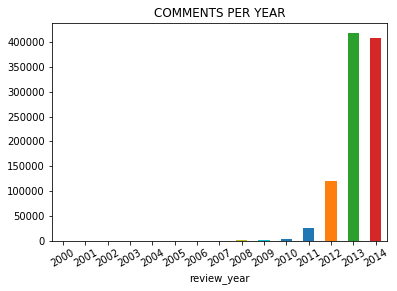

In [7]:
#lets visualize comments per year
comments_per_year = df.groupby("review_year").count()["review_text"].plot.bar()
comments_per_year.set_xticklabels(comments_per_year.get_xticklabels(),rotation=30)
plt.title('COMMENTS PER YEAR')
sb.set_context(font_scale=1)  #in year 2013 400000 product is reviewed

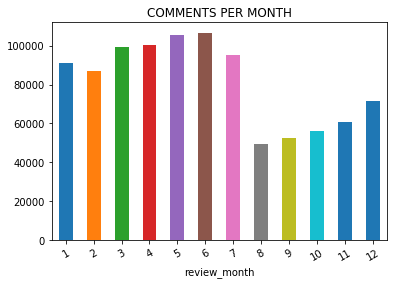

In [8]:
#now lets dig deeper on days/month
comments_per_month = df.groupby("review_month").count()["review_text"].plot.bar()
comments_per_month.set_xticklabels(comments_per_month.get_xticklabels(),rotation=30)
plt.title('COMMENTS PER MONTH')
sb.set_context(font_scale=1)

In [9]:
#lets review users who most reviewed
users_most_reviewed = df.groupby("reviewerName").count()["review_text"]
type(users_most_reviewed)

pandas.core.series.Series

In [10]:
number_of_reviews = []
for value in users_most_reviewed:
    number_of_reviews.append(value)

In [11]:
len(number_of_reviews)

55446

In [12]:
top_reviewers = sorted(number_of_reviews,reverse=True)[:10]
top_reviewers

[53719, 10389, 3087, 1171, 1023, 1007, 928, 844, 829, 778]

In [13]:
plt.figure(figsize=(20,20))
sb.set_style('whitegrid')

most_reviewed = pd.DataFrame({'username':users_most_reviewed.index,"no_of_reviews":users_most_reviewed.values})

<Figure size 1440x1440 with 0 Axes>

In [14]:
most_reviewed.head(5)

,no_of_reviews,username
0,8,!!!DONNA!!!
1,5,#goodreads
2,22,#somanybooks
3,8,$ugar Bear
4,8,&#10059; blbards1 &#10059;


In [15]:
user_name = most_reviewed[most_reviewed['no_of_reviews'].isin(top_reviewers)]
user_name

,no_of_reviews,username
1175,829,Alexis
1627,53719,Amazon Customer
24118,10389,Kindle Customer
25135,1171,"LAS Reviewer \""The Long and the Short Of It Re..."
26766,928,Lisa
28574,844,MNix
41325,1007,Stuart Powell
44532,1023,Unknown
46237,3087,[0
46568,778,andrewsheath


Text(0.5,1,'USERS WHO REVIEWD MOST')

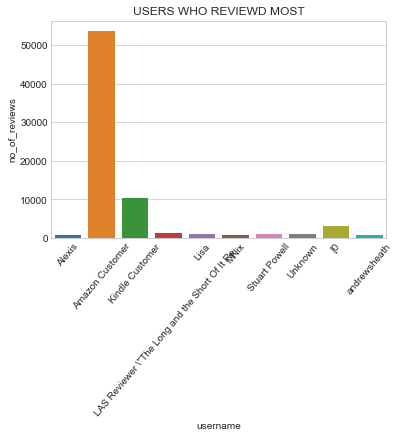

In [16]:
ax = sb.barplot(x='username',y='no_of_reviews',data = user_name)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.title('USERS WHO REVIEWD MOST')

Text(0.5,1,'OCCURENCE OF ASIN ID')

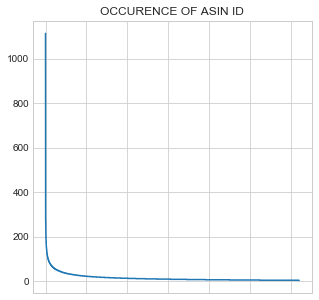

In [17]:
#occurence of asin in terms of ID
plt.figure(figsize=(5,5))
asin_id = df['asin'].value_counts().plot()
asin_id.set_xticklabels(asin_id.get_xticklabels(),rotation=90)
plt.title('OCCURENCE OF ASIN ID')

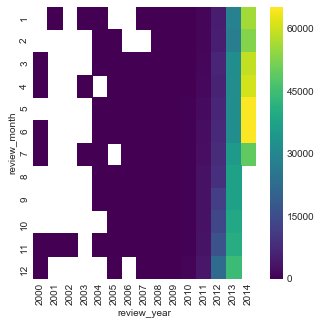

In [18]:
#highest month user reviewed
highest_month_user_reviewed = df.groupby(["review_month","review_year"]).count()["review_text"].unstack()
plt.figure(figsize=(5,5))
sb.heatmap(highest_month_user_reviewed,cmap='viridis')

On month **May,June 2014** maximum kindle books are reviewed

#### Visualizing how much reviews are helpfull #####
visualizing how many comments are usefull. The representation **2,2** is out of 2 comments both 2 comments are useful. If **helpful** column has **0,10** out of 10 reviews **no reviews** are usefull to the customers

In [19]:
#before we count the values, we need to preprocess the helpfull column to get insights
helpfull = pd.Series(df["helpfull"])
len(helpfull)

980592

In [20]:
import re

rows_to_remove = []
regex = '^[a-zA-Z]+'

def isalpha(index,data):
    boolvalue = False
    
    if re.match(regex,data):
        boolvalue = True
        return index,boolvalue
    else:
        return index,boolvalue
    
for index,value in enumerate(helpfull):
    ind,boolvalue = isalpha(index,value)
    if boolvalue == True:
        rows_to_remove.append(index)

len(rows_to_remove)

739

In [21]:
rows_to_remove[5]

5854

In [22]:
#now copy the df
dup_df = df
dup_df.shape

(980592, 12)

In [23]:
dup_df = dup_df.drop(dup_df.index[rows_to_remove])

In [24]:
dup_df.shape

(979853, 12)

In [25]:
dup_df = dup_df.drop(dup_df.index[384])
dup_df.shape

(979852, 12)

In [26]:
#now take value_counts
import string

how_much_reviews_helpfull = pd.Series(dup_df['helpfull'])
review_rank = []
us_row = []
for count,reviews in enumerate(how_much_reviews_helpfull):
    #to check if string starts with alphanumeric
    alpha = string.ascii_letters
    if reviews.startswith(alpha) or reviews.startswith('"') or reviews.startswith("'"):
        us_row.append(count)

len(us_row)

3862

In [27]:
dup_df = dup_df.drop(dup_df.index[us_row])
dup_df.shape

(975990, 12)

In [35]:
#lets get more insights from amazon customer data
most_reviewed_person = df[df['reviewerName'] == "Amazon Customer"]
most_reviewed_person.head(5)

,asin,helpfull,overall,reviewId,review_text,reviewerName,summary,unixReviewTime,reviewTime,review_year,review_month,review_date
25,B000FBFMVG,"0, 0",5.0,A3AZH0OO0GUAI3,Really shouldn't have Han Solo on the cover as...,Amazon Customer,An interesting short story.,1392422400,02-15- 2014,2014,2,15
137,B000JMKX4W,"0, 0",4.0,A3L37OKQ8YTJQ5,I guess his diary was just like anybodies. It ...,Amazon Customer,Diary of a Nobody,1379462400,09-18- 2013,2013,9,18
138,B000JMKX4W,"0, 0",3.0,A1SD8Y9Q1KESLB,It's funny. Definitely worth the price (free)....,Amazon Customer,Fun read,1386460800,12- 8- 2013,2013,12,8
149,B000JMKXYW,"0, 0",3.0,A3L37OKQ8YTJQ5,It was an OK read although at sixty seven I fo...,Amazon Customer,Captain Stormfield's Visit to Heaven,1379462400,09-18- 2013,2013,9,18
178,B000JML2H4,"0, 0",3.0,A38ZV2FL84EUF5,I thought it would be sweet to share these wit...,Amazon Customer,I prefer free form prayer,1354060800,11-28- 2012,2012,11,28


In [36]:
highest_id_reviews = most_reviewed_person.groupby(["reviewId"]).count()["review_year"]
highest_id_reviews.shape

(4934,)

Text(0.5,1,'MOST REVIEWED ID')

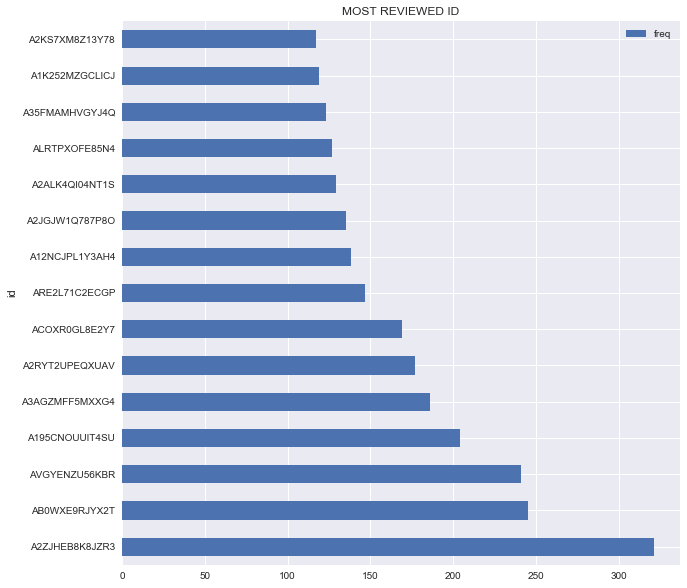

In [37]:
highest_id_df = pd.DataFrame({"id":highest_id_reviews.index,"freq":highest_id_reviews.values})
h_freq = highest_id_df.sort_values(by="freq",ascending=False)
h_freq = h_freq.head(15)
h_freq.set_index("id",inplace=True)

plt.style.use("ggplot")
sb.set(rc={"figure.figsize":(10,10)})
h_freq.plot.barh() #to plot horizontally
plt.title("MOST REVIEWED ID")

Let's visualize the aspects that most customer used in reviews

In [42]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

top_n = 10
stop_words = set(stopwords.words('english'))

The data is too huge to load and tokenize all **review_text** to the variable. There are more that **(>900000)** rows in the dataset and while tokenizing those data it may lead to more than **2000000000** words, which is heavy data to load in the cache. So  we going to separate into small batch size and analyse the top 5 aspects in the each batch and its frequency.

In [44]:
batch_size =  50000
starting_point = 0
total_iter = 20
df.shape #so total data is 980592 which we need total 20 iterations

(980592, 12)

In [96]:
import nltk

def do_the_analysis(series_review_data):
    columns = ['word','frequency']
    word_tokens_tags = word_tokenize(series_review_data)
    filtered_sentence = [w for w in word_tokens_tags if not w in stop_words]
    #preprocessing
    meaningfull_char = [words for words in filtered_sentence if len(words) > 3]
    #remove numbers
    remove_numerical_characters = [words for words in meaningfull_char if not words.isnumeric()]
    #calculate frequency distribution
    words_dist_tags = nltk.FreqDist(remove_numerical_characters)
    mst_cmn = pd.DataFrame(words_dist_tags.most_common(top_n),columns=columns)
    
    #plot the graph
    plt.figure(figsize=(10,10))
    sb.set_style('whitegrid')
    sb.barplot(x='word',y='frequency',data=mst_cmn.head(10))

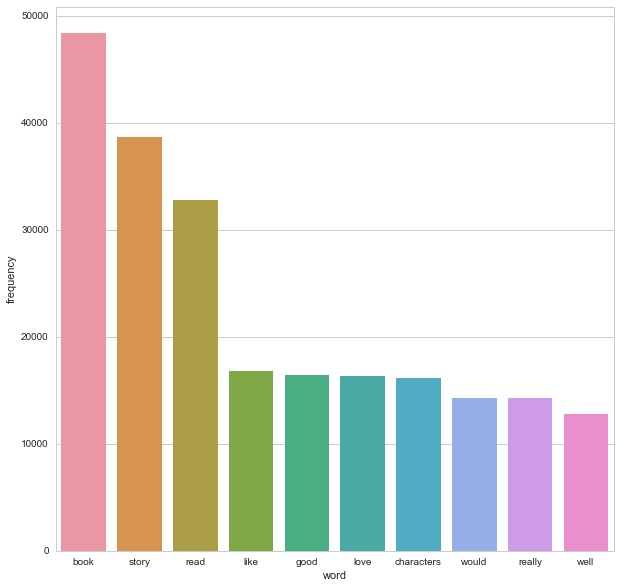

In [97]:
reviews = df["review_text"].iloc[0:50000]
reviews = reviews.str.lower().str.cat(sep=' ')
reviews = re.sub('[^A-Za-z+]',' ',reviews)

do_the_analysis(reviews)

Using same dataframe for different batches just append to the dataframe. For every batches we sort of need to **create a new dataframe with new name** to store top 10 words in each batch size. To do this, we need to introduce a **third variable** to create a different dataframe name.

Finished Analysing Sentiment for 10000 data in dataframe
Finished Analysing Sentiment for 20000 data in dataframe
Finished Analysing Sentiment for 30000 data in dataframe
Finished Analysing Sentiment for 40000 data in dataframe
Finished Analysing Sentiment for 50000 data in dataframe
Finished Analysing Sentiment for 60000 data in dataframe
Finished Analysing Sentiment for 70000 data in dataframe
Finished Analysing Sentiment for 80000 data in dataframe
Finished Analysing Sentiment for 90000 data in dataframe
Finished Analysing Sentiment for 100000 data in dataframe
Finished Analysing Sentiment for 110000 data in dataframe
Finished Analysing Sentiment for 120000 data in dataframe
Finished Analysing Sentiment for 130000 data in dataframe
Finished Analysing Sentiment for 140000 data in dataframe
Finished Analysing Sentiment for 150000 data in dataframe
Finished Analysing Sentiment for 160000 data in dataframe
Finished Analysing Sentiment for 170000 data in dataframe
Finished Analysing Sent

Text(0.5,1,'SENTIMENT ANALYSIS FOR FIRST 200000 DESCRIPTION')

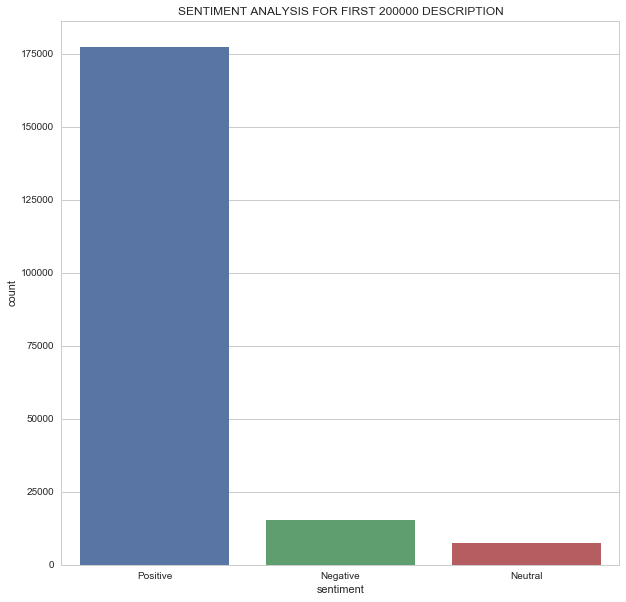

In [103]:
#now calculate the sentiment analysis for review_text
from textblob import TextBlob

sentiment_list = list()
description = df['review_text'].iloc[0:200000].astype(str)

i=1
for desc in description:
    blob = TextBlob(desc)
    sentiment_list.append((desc,blob.sentiment.polarity,blob.sentiment.subjectivity))
    polarity_df = pd.DataFrame(sentiment_list,columns=['sentence','sentiment','polarity'])
    
    if i % 10000 == 0:
        print("Finished Analysing Sentiment for {val} data in dataframe".format(val=i))
    
    i+=1 #increment the value i
      
def f(polarity_df):
     
    if polarity_df['sentiment'] > 0:
        val = 'Positive'
    elif polarity_df['sentiment'] == 0:
        val = 'Neutral'
    else:
        val = 'Negative'
    
    return val


polarity_df['sentiment'] = polarity_df.apply(f,axis=1)
sb.set_style('whitegrid')
sb.countplot(x='sentiment',data=polarity_df)
plt.title('SENTIMENT ANALYSIS FOR FIRST 200000 DESCRIPTION')

In [104]:
#save the dataframe
polarity_df.to_csv('sentiment_reviews.csv',sep=",")